The Sparks Foundation -  Data Science and Business Analytics


Task 1 :  Prediction using Supervised ML



Aim: To predict the score of a student who studies for 9.25 hours/day.

Author : Anshuman Kumar Avinav

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

--> Import the data :

In [27]:
df=pd.read_csv('http://bit.ly/w-data')

In [28]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [29]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [30]:
df.shape

(25, 2)

In [31]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [33]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

--> Plot the data :

C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Hours', ylabel='Scores'>

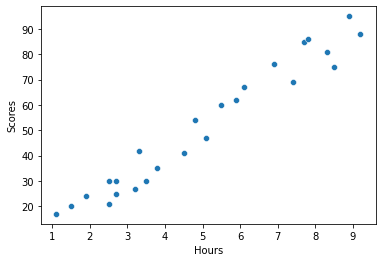

In [34]:
sns.scatterplot(df['Hours'],df['Scores'])

In [35]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hours', ylabel='Density'>

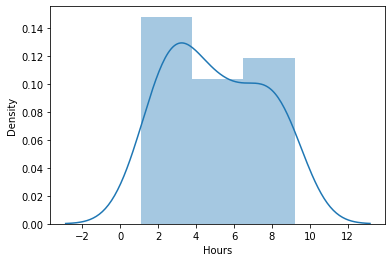

In [36]:
sns.distplot(df['Hours'])

C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Scores', ylabel='Density'>

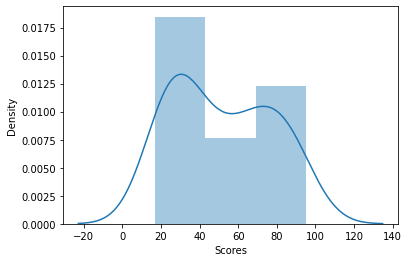

In [37]:
sns.distplot(df['Scores'])

In [38]:
X=df.iloc[:,:-1].values


In [39]:
Y=df.iloc[:,1].values
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

--> Train_test_split the data :

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

--> Training the algorithm :

In [41]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()


In [42]:
lm.fit(X_train,Y_train)

LinearRegression()

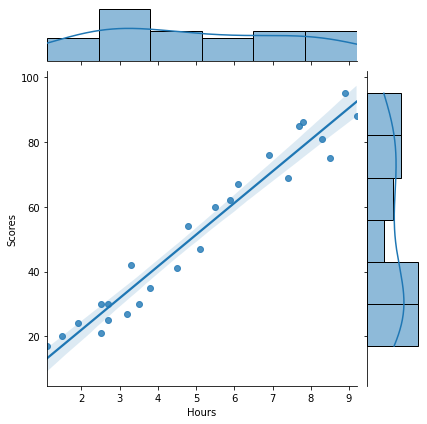

In [43]:
sns.jointplot(x=df['Hours'],y=df['Scores'],data=df,kind='reg')



--> Making the Predictions :

In [44]:
X_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [45]:
Y_pred=lm.predict(X_test)

In [46]:
Predict_={'Acurate':Y_test, 'Predicted':Y_pred}

In [47]:
pd.DataFrame(Predict_)


,Acurate,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [48]:
hrs=9.25
prediction=lm.predict([[hrs]])
print(f"If student is studying {hrs} hours then the score will be {prediction}")


If student is studying 9.25 hours then the score will be [93.69173249]


--> Evaluation of Model:

In [49]:
from sklearn import metrics
print(f"Mean absolute Error : {metrics.mean_absolute_error(Y_test,Y_pred)}")

Mean absolute Error : 4.183859899002975


In [50]:
from sklearn.metrics import r2_score
print(f"R2 value is : {r2_score(Y_test,Y_pred)}")

R2 value is : 0.9454906892105355



Conclusion : The marks of the student who studies for 9.25 hours per day is 93.69.